# Boosting

In [66]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline


### Import MNIST Train and Test Data

In [67]:
mnist_train = os.path.join('train.csv')
mnist_test = os.path.join('test.csv')

mnist_train_df = pd.read_csv(mnist_train, header=None).T
mnist_test_df = pd.read_csv(mnist_test, header=None).T
last_column = mnist_test_df.columns[-1]
mnist_train_df.rename(columns={last_column:'Class'}, inplace=True)
mnist_test_df.rename(columns={last_column:'Class'}, inplace=True)

mnist_train_labels = mnist_train_df['Class']
mnist_test_labels = mnist_test_df['Class']

X_mnist_train = mnist_train_df.drop('Class',axis=1)
y_mnist_train = mnist_train_labels

X_mnist_test = mnist_test_df.drop('Class',axis=1)
y_mnist_test = mnist_test_labels
X_mnist_train.shape

(24217, 784)

### Run PCA


In [68]:
pca = PCA(n_components=20)
X_mnist_train_pca = pca.fit_transform(X_mnist_train)
mnist_train_df_pca = pd.DataFrame(X_mnist_train_pca)
mnist_train_df_pca['Class'] = y_mnist_train
X_mnist_train_pca = mnist_train_df_pca.drop('Class',axis=1)


X_mnist_test_pca = pca.fit_transform(X_mnist_test)
mnist_test_df_pca = pd.DataFrame(X_mnist_test_pca)
mnist_test_df_pca['Class'] = y_mnist_test
X_mnist_test_pca = mnist_test_df_pca.drop('Class',axis=1)

## Single iteration of AdaBoost

In [69]:
X = X_mnist_train_pca;    
y = y_mnist_train;
num_iterations = 10;
n, _ = X.shape
K = len(np.unique(y))

### Initialize sample weights

In [70]:
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

### Fit the decision tree

In [71]:
decision_tree = DecisionTreeClassifier(max_depth=1)
decision_tree.fit(X, y, sample_weight=sample_weight)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Predict

In [72]:
y_pred = decision_tree.predict(X)

### Find incorrectly classified samples.   

In [73]:
misclassified = (y_pred != y)

### Compute Error

In [74]:
err_train = np.average(misclassified, weights=sample_weight, axis=0)
err_train = err_train/sample_weight_sum
print "Iteration#: 1" " Training_error: ", err_train    

Iteration#: 1 Training_error:  0.485485402816


### Compute new alphas given error

In [75]:
alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)


### Update sample weights given alpha and normalize it

In [76]:
for i in range(n):
    if misclassified[i]: 
        sample_weight[i] *= np.exp(alpha)            

# Re-normalize weights
sample_weight_sum = sample_weight.sum(dtype=np.float64)          
sample_weight = sample_weight / sample_weight_sum


### Run n iterations of AdaBoost

In [77]:
X = X_mnist_train_pca;    
y = y_mnist_train;
num_iterations = 10;
n, _ = X.shape
K = len(np.unique(y))
    
errors = np.zeros(num_iterations, dtype=np.float)
    
# Initialize weights to 1 / n_samples
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

max_depth = 1;

for iteration in range(num_iterations):    
    
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit decision tree
    decision_tree.fit(X, y, sample_weight=sample_weight)
    y_pred = decision_tree.predict(X)
        
    # Find incorrectly classified samples.   
    misclassified = (y_pred != y)
        
    # Error
    err_train = np.average(misclassified, weights=sample_weight, axis=0)
    err_train = err_train/sample_weight_sum
    print "Iteration#: ",iteration, " Training_error: ", err_train    
      
    # Boost weight using AdaBoost SAMME algo
    alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)
        
    # Set sample weight
    for i in range(n):
        if misclassified[i]: 
            sample_weight[i] *= np.exp(alpha)            

    # Re-normalize weights
    sample_weight_sum = sample_weight.sum(dtype=np.float64)          
    sample_weight = sample_weight / sample_weight_sum
        
    errors[iteration] = err_train  

Iteration#:  0  Training_error:  0.485485402816
Iteration#:  1  Training_error:  0.191617890186
Iteration#:  2  Training_error:  0.0753514962347
Iteration#:  3  Training_error:  0.0201957735387
Iteration#:  4  Training_error:  0.00902244705979
Iteration#:  5  Training_error:  0.00205715461567
Iteration#:  6  Training_error:  0.000186854815912
Iteration#:  7  Training_error:  0.000140170233029
Iteration#:  8  Training_error:  2.01682501807e-05
Iteration#:  9  Training_error:  4.56990265033e-06


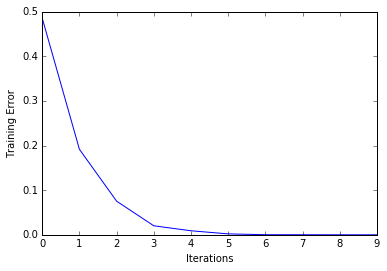

In [78]:
err_plot = plt.plot(errors)
plt.ylabel('Training Error');
plt.xlabel('Iterations')
plt.show()


In [79]:
 
errors_depth_10 = np.zeros(num_iterations, dtype=np.float)
    
# Initialize weights to 1 / n_samples
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

max_depth = 10;

for iteration in range(num_iterations):    
    
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit decision tree
    decision_tree.fit(X, y, sample_weight=sample_weight)
    y_pred = decision_tree.predict(X)
        
    # Find incorrectly classified samples.   
    misclassified = (y_pred != y)
        
    # Error
    err_train = np.average(misclassified, weights=sample_weight, axis=0)
    err_train = err_train/sample_weight_sum
    print "Iteration#: ",iteration, " Training_error: ", err_train    
      
    # Boost weight using AdaBoost SAMME algo
    alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)
        
    # Set sample weight
    for i in range(n):
        if misclassified[i]: 
            sample_weight[i] *= np.exp(alpha)            

    # Re-normalize weights
    sample_weight_sum = sample_weight.sum(dtype=np.float64)          
    sample_weight = sample_weight / sample_weight_sum
        
    errors_depth_10[iteration] = err_train  

Iteration#:  0  Training_error:  0.0378246686212
Iteration#:  1  Training_error:  0.0217115525265
Iteration#:  2  Training_error:  0.00471869953728
Iteration#:  3  Training_error:  0.000558602472076
Iteration#:  4  Training_error:  3.25765565376e-05
Iteration#:  5  Training_error:  1.13061754196e-05
Iteration#:  6  Training_error:  1.74579751631e-06
Iteration#:  7  Training_error:  4.23075693404e-07
Iteration#:  8  Training_error:  3.59111856169e-08
Iteration#:  9  Training_error:  7.89110150622e-10


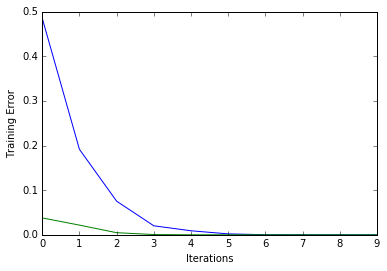

In [80]:
error1 = plt.plot(errors, label='Depth=1');
error2 = plt.plot(errors_depth_10, label='Depth=10');
plt.ylabel('Training Error');
plt.xlabel('Iterations')
plt.show()